In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.7 (v3.6.7:6ec5cf24b7, Oct 20 2018, 13:35:33) [MSC v.1900 64 bit (AMD64)]
scipy: 1.2.0
numpy: 1.16.1
matplotlib: 3.0.2
pandas: 0.24.1
sklearn: 0.20.2


In [2]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [3]:
# Load dataset
url = "cars3.csv"
names = ['Age', 'Income', 'Credit Rating', 'Insurance Rating', 'class']
dataset = pandas.read_csv(url, names=names)

In [4]:
# shape
print(dataset.shape)

(150, 5)


In [6]:
# head
print(dataset.head(1000))

     Age  Income  Credit Rating  Insurance Rating     class
0     51   35000            1.4               0.2  Mercedes
1     49   30000            1.4               0.2  Mercedes
2     47   32000            1.3               0.2  Mercedes
3     46   31000            1.5               0.2  Mercedes
4     50   36000            1.4               0.2  Mercedes
5     54   39000            1.7               0.4  Mercedes
6     46   34000            1.4               0.3  Mercedes
7     50   34000            1.5               0.2  Mercedes
8     44   29000            1.4               0.2  Mercedes
9     49   31000            1.5               0.1  Mercedes
10    54   37000            1.5               0.2  Mercedes
11    48   34000            1.6               0.2  Mercedes
12    48   30000            1.4               0.1  Mercedes
13    43   30000            1.1               0.1  Mercedes
14    58   40000            1.2               0.2  Mercedes
15    57   44000            1.5         

In [7]:
# descriptions
print(dataset.describe())

              Age        Income  Credit Rating  Insurance Rating
count  150.000000    150.000000     150.000000        150.000000
mean    58.433333  30540.000000       3.758667          1.198667
std      8.280661   4335.943114       1.764420          0.763161
min     43.000000  20000.000000       1.000000          0.100000
25%     51.000000  28000.000000       1.600000          0.300000
50%     58.000000  30000.000000       4.350000          1.300000
75%     64.000000  33000.000000       5.100000          1.800000
max     79.000000  44000.000000       6.900000          2.500000


In [8]:
# class distribution
print(dataset.groupby('class').size())

class
BMW         50
Mercedes    50
Porsche     50
dtype: int64


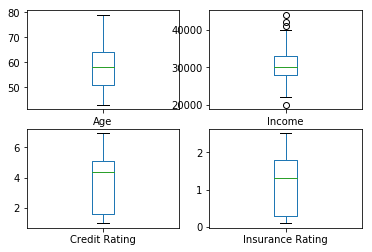

In [9]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

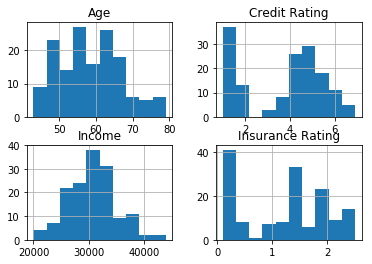

In [10]:
# histograms
dataset.hist()
plt.show()

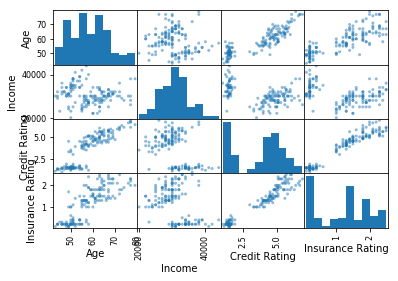

In [11]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [12]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [13]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [14]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('AB', AdaBoostClassifier(n_estimators=50, learning_rate=1)))
models.append(('KM', KMeans(n_clusters=3)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

NameError: name 'KMeans' is not defined

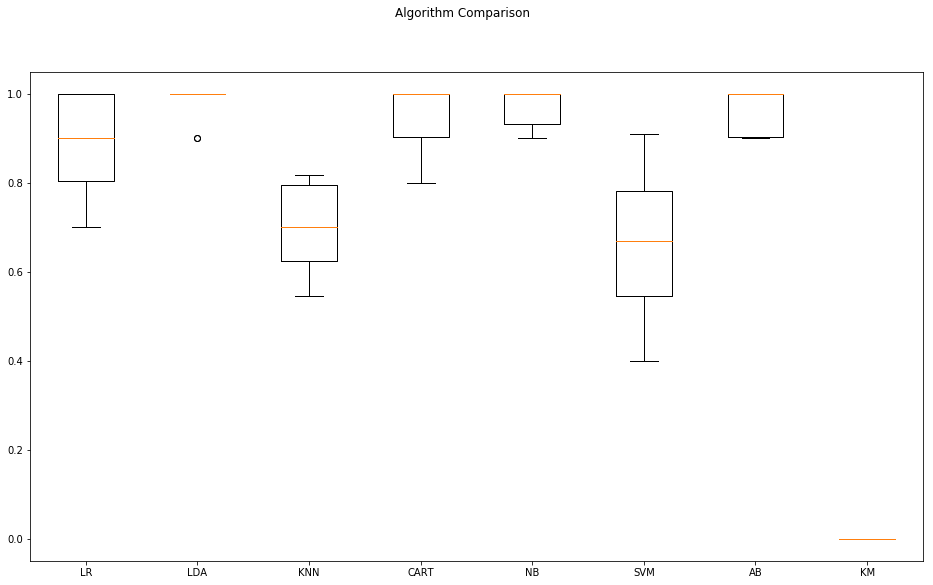

In [18]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
# Make predictions on validation dataset
knn = GaussianNB()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8888888888888888
[[13  0  3]
 [ 0 12  0]
 [ 2  0 15]]
              precision    recall  f1-score   support

         BMW       0.87      0.81      0.84        16
    Mercedes       1.00      1.00      1.00        12
     Porsche       0.83      0.88      0.86        17

   micro avg       0.89      0.89      0.89        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.89      0.89      0.89        45



In [20]:
print(knn.predict([[40,40000,5.1,6.1]]))

['Porsche']


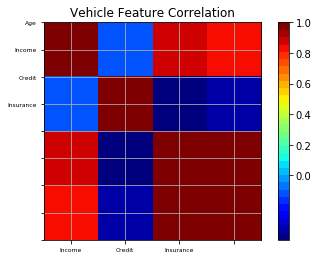

In [16]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Vehicle Feature Correlation')
    labels=['Age', 'Income', 'Credit', 'Insurance',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0,0.2,0.4,.6,.8,1])
    plt.show()

correlation_matrix(dataset)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

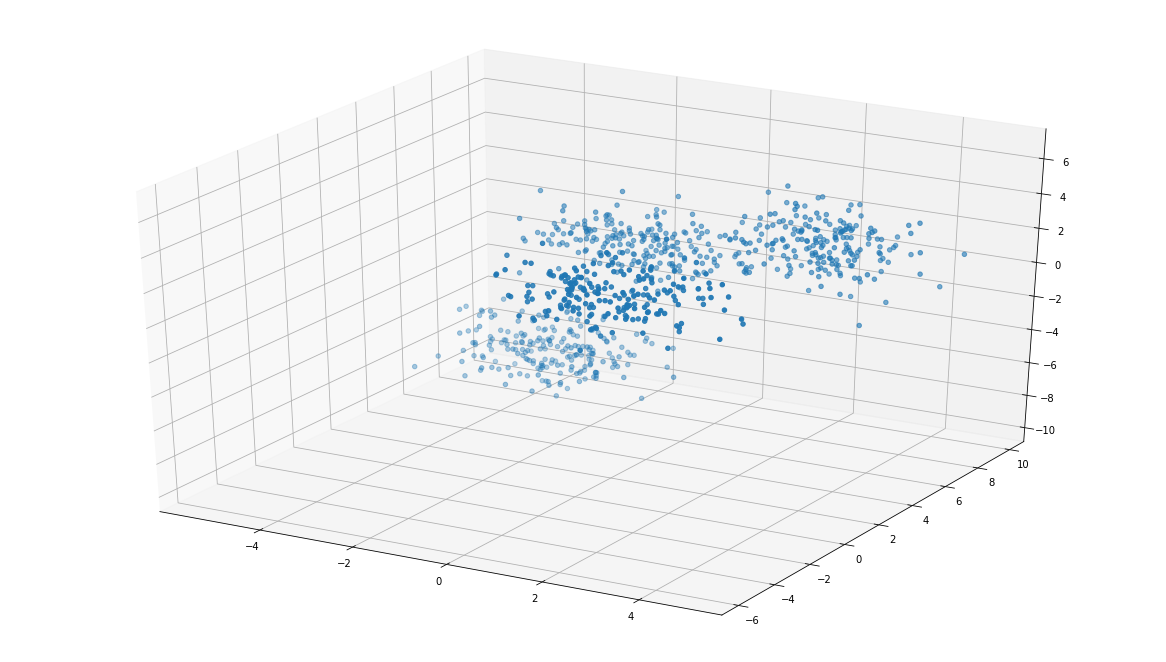

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [11]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

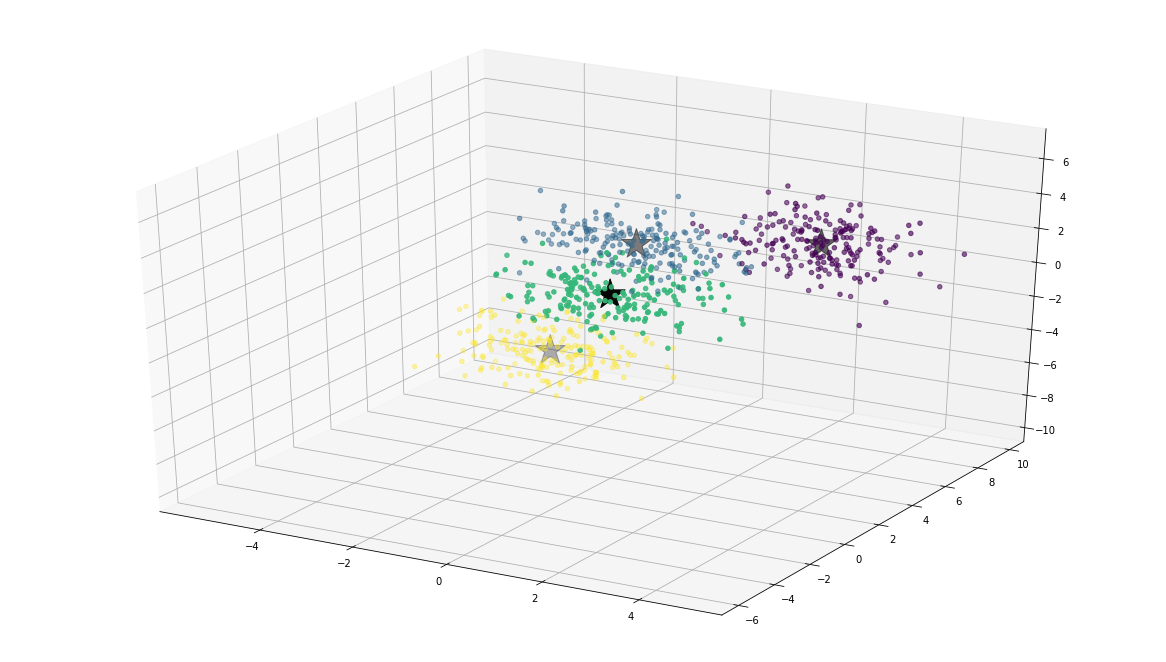

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)